# Stock Analysis in Python

In this code work, I randomly pick ten stocks contributing to NIFTY 50 index and try and apply some concepts of finance and portfolio management using Python code. Some of the application that will be implemented are:
1) Calculating returns, log returns and risk of individual stocks.
2) Calculating returns, log returns and risk of a portfolio formed out of these stocks using randomly assigned weights.
3) Drawing the efficient frontier based on Markowitz Portfolio Theory.

The 5 stocks I have chosen are TCS, HINDALCO, ITC, CIPLA, ONGC, ICICIBANK, RELIANCE, BRITANNIA, BHARTIAIRTEL and BAJAJFINSERV. 

Assumptions:
1) For annualizing mean and variances of daily returns, I have assumed one year has 250 days when market operates.
2) The portfolio construction is based on last 5 years data from 19th May 2017 to 19th May 2022.


## For Cryptocurrency Markets

If working on cryptocurrencies, only one thing needs to be changed. For annualizing returns and covariances, use 365 instead of 250, because unlike Stock Markets, Cryptocurrency markets operate 24x7, throughout the year.

In [5]:
# We need pandas_datareader module to scrape financial data directly from Yahoo finance.
!pip install git+https://github.com/pydata/pandas-datareader.git

  Cloning https://github.com/pydata/pandas-datareader.git to /tmp/pip-req-build-i511yqog
  Running command git clone --filter=blob:none -q https://github.com/pydata/pandas-datareader.git /tmp/pip-req-build-i511yqog
  Resolved https://github.com/pydata/pandas-datareader.git to commit ab26ad2099d6a7bc79447e71d72cdb93d8299b3c
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 6.9 MB 4.5 MB/s            
  Created wheel for pandas-datareader: filename=pandas_datareader-0.11.0.dev0+12.gab26ad2-py3-none-any.whl size=109746 sha256=985220b4d14091a5eeacf05ca6dbff6b5af19887da2256b51ac46da5b7606a18
  Stored in directory: /tmp/pip-ephem-wheel-cache-rx__b80h/wheels/18/ff/8f/54606005483e63edde2e940e848ee710ddb8adbb2163ae7c63
Successfully built pandas-datareader


In [6]:
# Importing all the necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as wb

In [7]:
# Create a list with name of ticker and mention the required tickers/stocks as mentioned in Yahoo finance for portfolio construction
# Create a blank dataframe and then using a for loop, add columns representing the adjusted closing prices for the stocks.
tickers = ['TCS.NS','HINDALCO.NS','ITC.NS','CIPLA.NS','ONGC.NS','ICICIBANK.NS','RELIANCE.NS','BRITANNIA.NS',
          'BHARTIARTL.NS','BAJAJFINSV.NS']

mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source = 'yahoo', start = '2017-5-19',end = '2022-5-19' )['Adj Close']

In [8]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1237 entries, 2017-05-19 to 2022-05-20
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TCS.NS         1237 non-null   float64
 1   HINDALCO.NS    1237 non-null   float64
 2   ITC.NS         1237 non-null   float64
 3   CIPLA.NS       1237 non-null   float64
 4   ONGC.NS        1237 non-null   float64
 5   ICICIBANK.NS   1237 non-null   float64
 6   RELIANCE.NS    1237 non-null   float64
 7   BRITANNIA.NS   1237 non-null   float64
 8   BHARTIARTL.NS  1237 non-null   float64
 9   BAJAJFINSV.NS  1237 non-null   float64
dtypes: float64(10)
memory usage: 106.3 KB


In [9]:
mydata.head(5)

,TCS.NS,HINDALCO.NS,ITC.NS,CIPLA.NS,ONGC.NS,ICICIBANK.NS,RELIANCE.NS,BRITANNIA.NS,BHARTIARTL.NS,BAJAJFINSV.NS
Date,,,,,,,,,,
2017-05-19,1139.615112,185.618835,239.838272,552.505493,141.552582,270.561279,636.508606,1660.453125,333.167023,4162.225586
2017-05-22,1150.615479,184.889954,254.419678,550.696228,139.272644,267.741577,639.066406,1683.973877,332.988281,3956.904541
2017-05-23,1146.229248,186.590637,251.528534,521.454895,137.307159,269.680145,630.089539,1665.782837,332.407318,3975.719971
2017-05-24,1163.251831,181.780121,251.319000,508.203339,136.560303,270.252930,626.301025,1637.557983,329.234253,3946.673340
2017-05-25,1193.001953,185.181519,251.444687,492.898071,136.914062,279.945679,628.593445,1630.374268,331.334717,3989.744385


In [10]:
mydata.tail(5)

,TCS.NS,HINDALCO.NS,ITC.NS,CIPLA.NS,ONGC.NS,ICICIBANK.NS,RELIANCE.NS,BRITANNIA.NS,BHARTIARTL.NS,BAJAJFINSV.NS
Date,,,,,,,,,,
2022-05-16,3376.800049,390.950012,254.100006,933.400024,153.500000,683.000000,2427.199951,3284.899902,693.200012,12655.250000
2022-05-17,3451.600098,428.399994,264.700012,938.000000,163.149994,710.000000,2529.149902,3368.850098,707.049988,12972.099609
2022-05-18,3448.800049,436.100006,266.799988,957.099976,163.199997,707.349976,2538.350098,3394.350098,696.150024,12762.150391
2022-05-19,3261.949951,417.000000,275.649994,938.000000,160.000000,690.299988,2479.850098,3332.050049,674.250000,12413.849609
2022-05-20,3293.000000,429.100006,280.000000,978.400024,161.899994,709.549988,2624.449951,3450.250000,687.900024,12561.700195


In [11]:
# mydata.to_csv('Dataset for Analysis')

### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalization is done so that the prices of all respective stocks are set to 100. This is a form of scaling that helps in easy visualization of how individual stocks performed in a given timeframe, since many stocks have different price ranges and visualizing them using absolute prices will be difficult due to scalability issues.

In [12]:
mydata.iloc[0]

TCS.NS           1139.615112
HINDALCO.NS       185.618835
ITC.NS            239.838272
CIPLA.NS          552.505493
ONGC.NS           141.552582
ICICIBANK.NS      270.561279
RELIANCE.NS       636.508606
BRITANNIA.NS     1660.453125
BHARTIARTL.NS     333.167023
BAJAJFINSV.NS    4162.225586
Name: 2017-05-19 00:00:00, dtype: float64

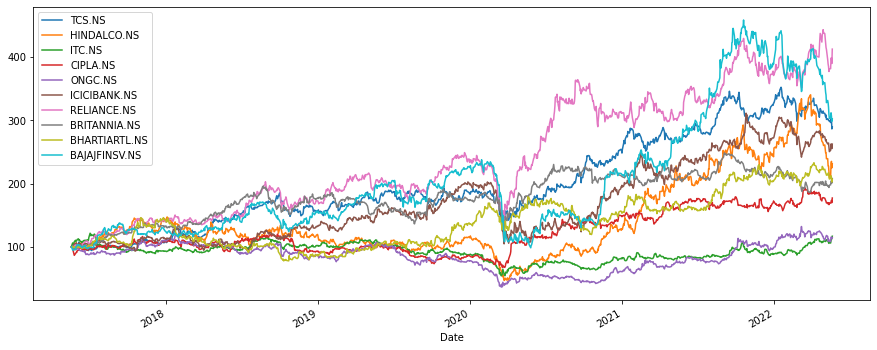

In [13]:
(mydata/mydata.iloc[0] * 100).plot(figsize =(15,6))
plt.show()

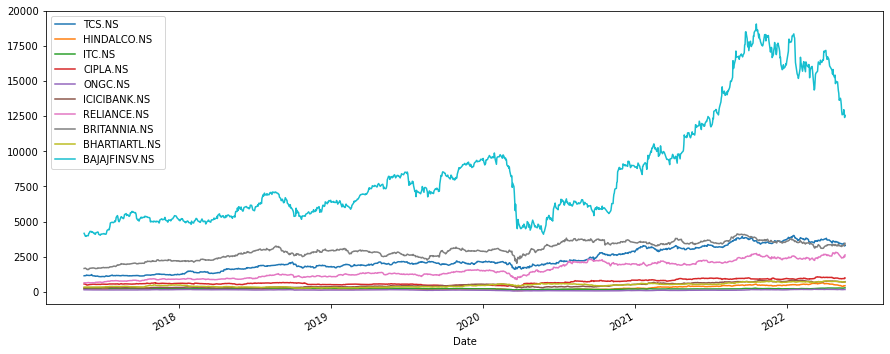

In [14]:
mydata.plot(figsize = (15,6))
plt.show()

### Log Return of Individual Stocks in Portfolio

Q. Why do we use logarithm of returns as compared to absolute returns?
A. Converting stock prices to log returns is useful in two ways:
1) Firstly, it addresses the base effect problem. In case of absolute returns, the point of reference is changed which can lead to large on/off values for returns. For more information about the base effect problem, please refer: https://www.investopedia.com/terms/b/base-effect.asp
2) Log returns are additive, meaning we can add them to create weekly, monthly and yearly figures without difficulty. In case of absolute returns, this is not possible. This becomes particularly useful when we are estimating average returns or creating the covariance matrix of the individual stocks. 

An important assumption that using log returns makes is that the returns are small, such that:

$$
log(1+x) \approx x, \space x << 1
$$

In [15]:
log_returns = np.log(mydata/mydata.shift(1))

In [16]:
log_returns

,TCS.NS,HINDALCO.NS,ITC.NS,CIPLA.NS,ONGC.NS,ICICIBANK.NS,RELIANCE.NS,BRITANNIA.NS,BHARTIARTL.NS,BAJAJFINSV.NS
Date,,,,,,,,,,
2017-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-22,0.009606,-0.003934,0.059020,-0.003280,-0.016238,-0.010476,0.004010,0.014066,-0.000537,-0.050588
2017-05-23,-0.003819,0.009156,-0.011429,-0.054561,-0.014213,0.007214,-0.014146,-0.010861,-0.001746,0.004744
2017-05-24,0.014742,-0.026119,-0.000833,-0.025741,-0.005454,0.002122,-0.006031,-0.017089,-0.009592,-0.007333
2017-05-25,0.025253,0.018539,0.000500,-0.030579,0.002587,0.035237,0.003654,-0.004396,0.006360,0.010854
...,...,...,...,...,...,...,...,...,...,...
2022-05-16,-0.011220,0.007574,-0.017555,-0.001285,-0.000326,0.008307,0.000247,0.001950,0.004772,0.003717
2022-05-17,0.021909,0.091478,0.040869,0.004916,0.060969,0.038770,0.041145,0.025235,0.019783,0.024729
2022-05-18,-0.000812,0.017814,0.007902,0.020158,0.000306,-0.003739,0.003631,0.007541,-0.015536,-0.016317


In [17]:
# After calculating the log_returns, we annualize them to get yearly log returns.
log_returns.mean()*250

TCS.NS           0.214625
HINDALCO.NS      0.169497
ITC.NS           0.031316
CIPLA.NS         0.115586
ONGC.NS          0.027166
ICICIBANK.NS     0.195011
RELIANCE.NS      0.286535
BRITANNIA.NS     0.147928
BHARTIARTL.NS    0.146642
BAJAJFINSV.NS    0.223423
dtype: float64


\begin{eqnarray*}
Covariance Matrix: \  \   
\Sigma = \begin{bmatrix}
        \sigma_{1}^2 \ \sigma_{12} \ \dots \ \sigma_{1I} \\
        \sigma_{21} \ \sigma_{2}^2 \ \dots \ \sigma_{2I} \\
        \vdots \ \vdots \ \ddots \ \vdots \\
        \sigma_{I1} \ \sigma_{I2} \ \dots \ \sigma_{I}^2
    \end{bmatrix}
\end{eqnarray*}

In [18]:
# Annualizing the covariances of log returns.
log_returns.cov()*250

,TCS.NS,HINDALCO.NS,ITC.NS,CIPLA.NS,ONGC.NS,ICICIBANK.NS,RELIANCE.NS,BRITANNIA.NS,BHARTIARTL.NS,BAJAJFINSV.NS
TCS.NS,0.065800,0.029124,0.014184,0.013506,0.020405,0.021243,0.025073,0.015514,0.015654,0.021229
HINDALCO.NS,0.029124,0.172427,0.036665,0.026528,0.067043,0.068543,0.049644,0.028621,0.048826,0.068558
ITC.NS,0.014184,0.036665,0.075948,0.014666,0.032713,0.030570,0.023522,0.017795,0.023961,0.034669
CIPLA.NS,0.013506,0.026528,0.014666,0.080862,0.017460,0.016317,0.014033,0.015097,0.020086,0.017430
ONGC.NS,0.020405,0.067043,0.032713,0.017460,0.137923,0.043136,0.040565,0.020565,0.028053,0.043606
ICICIBANK.NS,0.021243,0.068543,0.030570,0.016317,0.043136,0.126700,0.043285,0.027799,0.039436,0.072204
RELIANCE.NS,0.025073,0.049644,0.023522,0.014033,0.040565,0.043285,0.098190,0.027992,0.030616,0.046556
BRITANNIA.NS,0.015514,0.028621,0.017795,0.015097,0.020565,0.027799,0.027992,0.063470,0.017786,0.037608
BHARTIARTL.NS,0.015654,0.048826,0.023961,0.020086,0.028053,0.039436,0.030616,0.017786,0.116316,0.043409
BAJAJFINSV.NS,0.021229,0.068558,0.034669,0.017430,0.043606,0.072204,0.046556,0.037608,0.043409,0.141492


In [19]:
# Getting the correlation matrix.
log_returns.corr()

,TCS.NS,HINDALCO.NS,ITC.NS,CIPLA.NS,ONGC.NS,ICICIBANK.NS,RELIANCE.NS,BRITANNIA.NS,BHARTIARTL.NS,BAJAJFINSV.NS
TCS.NS,1.000000,0.273421,0.200648,0.185154,0.214195,0.232653,0.311931,0.240068,0.178933,0.220018
HINDALCO.NS,0.273421,1.000000,0.320402,0.224662,0.434744,0.463741,0.381535,0.273584,0.344770,0.438925
ITC.NS,0.200648,0.320402,1.000000,0.187140,0.319625,0.311638,0.272384,0.256307,0.254939,0.334441
CIPLA.NS,0.185154,0.224662,0.187140,1.000000,0.165328,0.161209,0.157491,0.210734,0.207105,0.162951
ONGC.NS,0.214195,0.434744,0.319625,0.165328,1.000000,0.326314,0.348574,0.219804,0.221483,0.312151
ICICIBANK.NS,0.232653,0.463741,0.311638,0.161209,0.326314,1.000000,0.388073,0.309992,0.324855,0.539274
RELIANCE.NS,0.311931,0.381535,0.272384,0.157491,0.348574,0.388073,1.000000,0.354583,0.286484,0.394984
BRITANNIA.NS,0.240068,0.273584,0.256307,0.210734,0.219804,0.309992,0.354583,1.000000,0.207003,0.396851
BHARTIARTL.NS,0.178933,0.344770,0.254939,0.207105,0.221483,0.324855,0.286484,0.207003,1.000000,0.338375
BAJAJFINSV.NS,0.220018,0.438925,0.334441,0.162951,0.312151,0.539274,0.394984,0.396851,0.338375,1.000000


In [20]:
# To get a more colourful visualization of correlations, one can use seaborn heatmap.
import seaborn as sns

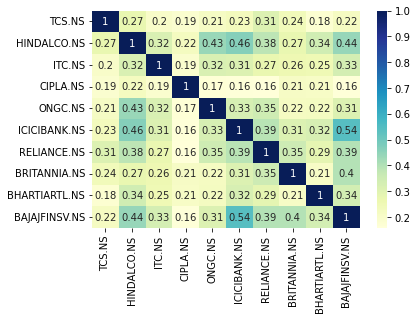

In [21]:
log_corrplt = sns.heatmap(log_returns.corr(), cmap="YlGnBu", annot=True)

In [22]:
# Creating a variable that stores the number of tickers the user has input.
num_assets = len(tickers)
num_assets

10

In [23]:
# In this step, we assign random weights to each of the stocks using numpy's random number generator and find the expected return and standard deviation of the resultant portfolio.
# This random weight generation and subsequent portfolio formation is repeated for 50,000 times.
# All the returns, volatilities and weights are added to the respective empty lists.
pf_returns = []
pf_volatilities = []
pf_weights = []

for x in range(50000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250 , weights))))
    pf_weights.append(weights)

In [24]:
# pf_returns, pf_volatilities and pf_weights are added to the portfolio dataframe using Pandas.
portfolios = pd.DataFrame({'Return' : pf_returns , 'Volatility' : pf_volatilities, 'Individual Weights' : pf_weights})

In [25]:
portfolios.head(5)

,Return,Volatility,Individual Weights
0,0.136042,0.209850,"[0.01642794107895776, 0.07001233607010644, 0.1..."
1,0.190133,0.199543,"[0.15279902068909268, 0.005500197185057611, 0...."
2,0.158452,0.202994,"[0.15790110642303604, 0.20128229755818802, 0.1..."
3,0.160788,0.201747,"[0.018231083628419447, 0.03999972952330102, 0...."
4,0.131808,0.200311,"[0.07095841138977593, 0.06631676024464601, 0.1..."


In [26]:
portfolios.tail(5)

,Return,Volatility,Individual Weights
49995,0.169981,0.204006,"[0.08000587118026607, 0.07070888214642616, 0.0..."
49996,0.137711,0.193096,"[0.11029323362252927, 0.11263632522533638, 0.1..."
49997,0.148477,0.203954,"[0.022018057227164954, 0.031652408077034545, 0..."
49998,0.136231,0.195414,"[0.15921542454941703, 0.1607127271871731, 0.20..."
49999,0.171100,0.205910,"[0.029510071694391907, 0.14491016826951503, 0...."


## Efficient Frontier and Global Minimum Variance Portfolio
<img src="https://financetrain.sgp1.cdn.digitaloceanspaces.com/2010/06/Efficient-Frontier.gif" style="width:600px;height:300px;">

Note that the efficient frontier is the blue line starting from the point represented by lowest standard deviation and highest expected return (i.e. Global Minimum Variance portfolio) and extends upwards (i.e. the blue line)

Text(0, 0.5, 'Expected Return')

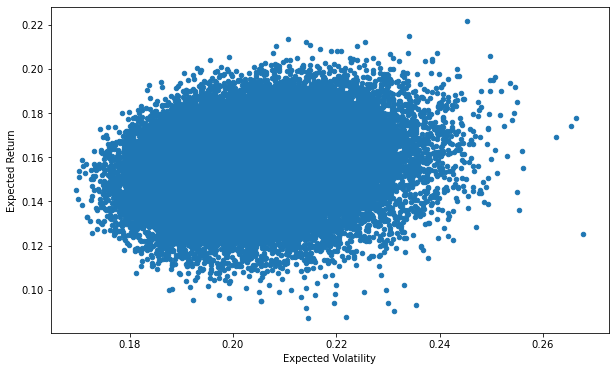

In [27]:
# Now comes the fun part. We plot the expected return vs standard deviation of the portfolio. 
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [28]:
print(portfolios[portfolios.Volatility == portfolios.Volatility.min()])

         Return  Volatility                                 Individual Weights
39208  0.145023    0.169586  [0.1672080298363589, 0.0051749598089208875, 0....


In [29]:
# In the last step, we present the global minimum variance portfolio, the one that a risk adverse investor desires.
# The individual weights are unbundled from an array and presented in a clearer manner for the user to easily understand.
column_list = []
for i in range(1, num_assets+1):
    column_list.append('x' + str(i))
    
pf_weightages = pd.DataFrame(pf_weights, columns = column_list)
merged_pf = portfolios
for i in column_list:
    merged_pf[i] = pf_weightages[i]
merged_pf = merged_pf.drop(columns = 'Individual Weights')
print(merged_pf[merged_pf.Volatility == merged_pf.Volatility.min()])
for j in range(len(tickers)):
    print(f'{tickers[j]} is {column_list[j]}')


         Return  Volatility        x1        x2        x3        x4        x5  \
39208  0.145023    0.169586  0.167208  0.005175  0.155704  0.184406  0.046253   

             x6        x7        x8        x9       x10  
39208  0.070464  0.083948  0.207851  0.070056  0.008935  
TCS.NS is x1
HINDALCO.NS is x2
ITC.NS is x3
CIPLA.NS is x4
ONGC.NS is x5
ICICIBANK.NS is x6
RELIANCE.NS is x7
BRITANNIA.NS is x8
BHARTIARTL.NS is x9
BAJAJFINSV.NS is x10
